In [1]:
import hist
import mplhep as hep
import matplotlib.pyplot as plt
import numpy as np

# Styles

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'))

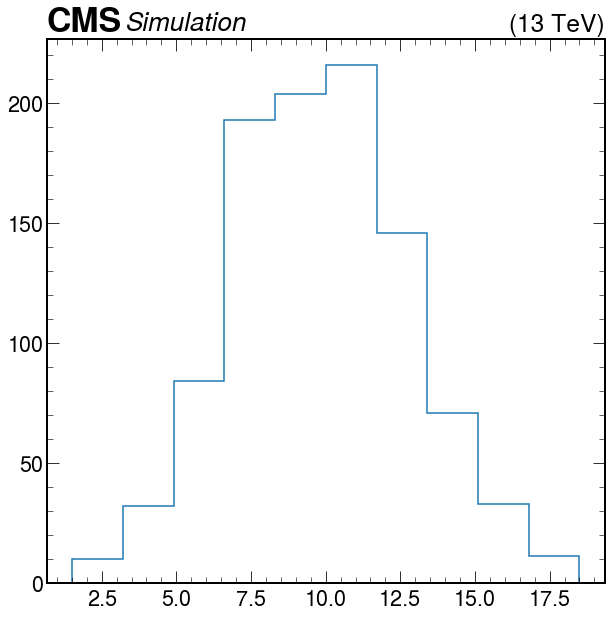

In [2]:
hep.style.use("CMS")
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)))
hep.cms.label() 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Tex Gyre Termes


(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

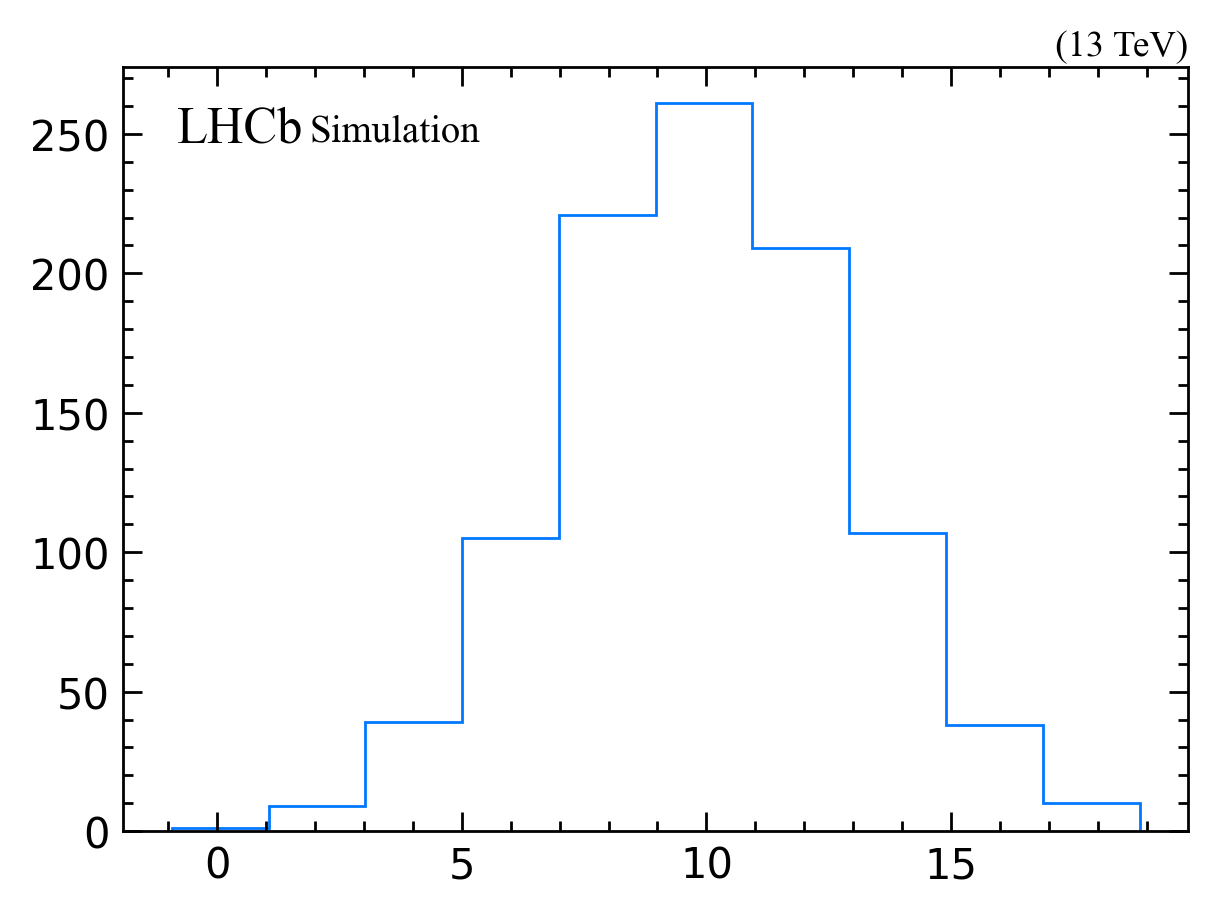

In [3]:
hep.style.use()
hep.style.use([hep.style.LHCb2])
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)))
hep.lhcb.label() 

(exptext: Custom Text(0.05, 0.95, 'ALICE'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

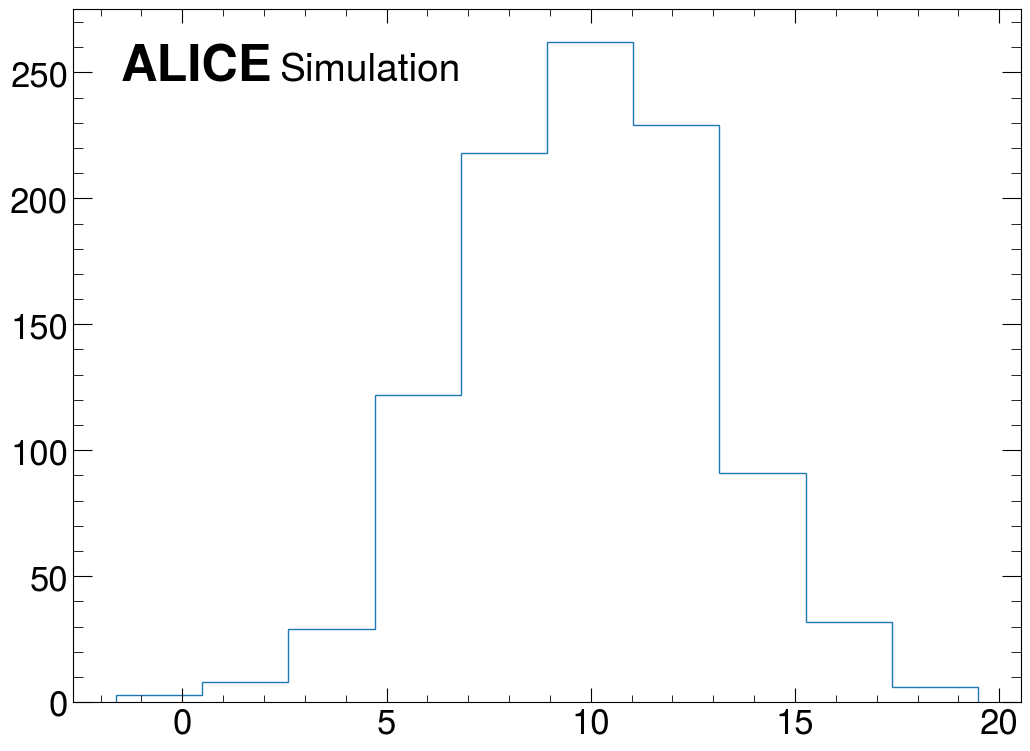

In [4]:
hep.style.use()
hep.style.use([hep.style.ALICE])
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)))
hep.alice.label() 

In [5]:
hep.style.use()

# Extended examples - mplhep

### Ratio Plot

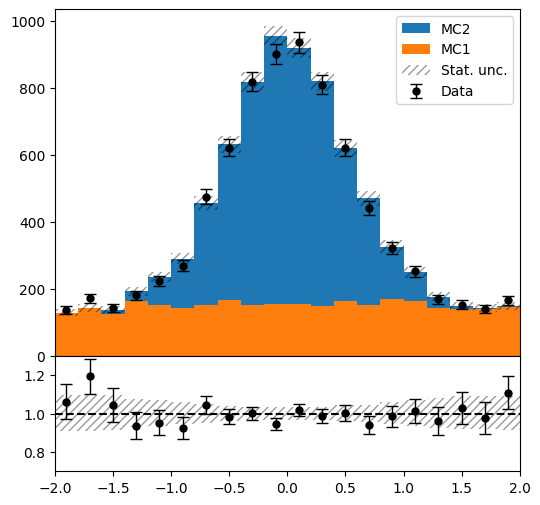

In [6]:
a = hist.Hist.new.Reg(20,-2,2).Int64().fill(np.random.uniform(-2,2,size=3000))
b = hist.Hist.new.Reg(20,-2,2).Int64().fill(np.random.normal(0,0.5,size=5000))
tot = a + b
data = tot.copy()
data[...] = np.random.poisson(tot.values())

from hist.intervals import ratio_uncertainty

fig, (ax, rax) = plt.subplots(2, 1, figsize=(6,6), gridspec_kw=dict(height_ratios=[3, 1], hspace=0), sharex=True)

hep.histplot([a, b], ax=ax, stack=True, histtype='fill', label=["MC1", "MC2"])
hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")

errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
ax.stairs(
    values=tot.values() + np.sqrt(tot.values()),
    baseline=tot.values() - np.sqrt(tot.values()),
    edges=tot.axes[0].edges, **errps, label='Stat. unc.')

yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
rax.stairs(1+yerr[1], edges=tot.axes[0].edges, baseline=1-yerr[0], **errps)
hep.histplot(data.values()/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
    ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


rax.axhline(1, ls='--', color='k')
rax.set_ylim(0.7, 1.3)
ax.set_xlim(-2, 2)
ax.legend();

### 2D Ratio plot

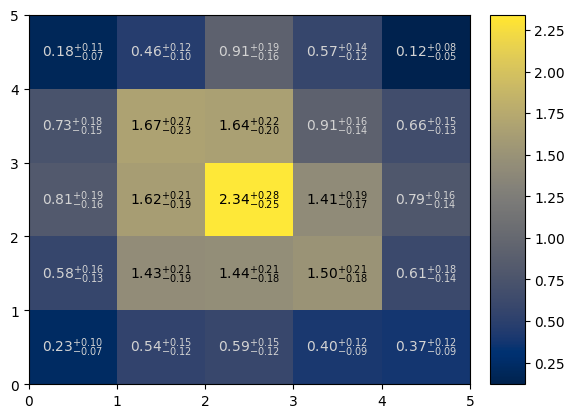

In [7]:
a = hist.Hist.new.Reg(5,-2,2).Reg(5,-2,2).Int64().fill(*np.random.normal(0,1,size=(2,1000)))
b = hist.Hist.new.Reg(5,-2,2).Reg(5,-2,2).Int64().fill(*np.random.uniform(-2,2,size=(2,1000)))

ratio = a.values() / b.values()
err_down, err_up = ratio_uncertainty(a.values(), b.values(), 'poisson')

def unctext(ra, u, d):
    ra, u, d = f'{ra:.2f}', f'{u:.2f}', f'{d:.2f}'
    return '$'+ra+'_{-'+d+'}^{+'+u+'}$'

labels = np.vectorize(unctext)(ratio, err_up, err_down)

hep.hist2dplot(ratio, labels=labels, cmap='cividis');

# Extended examples - hist

In [8]:
hep.style.use()

### Pull plots

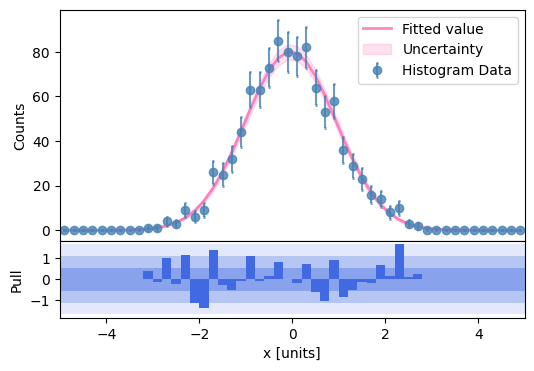

In [9]:
def pdf(x, a=1 / np.sqrt(2 * np.pi), x0=0, sigma=1, offset=0):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2)) + offset

np.random.seed(0)

hist_1 = hist.Hist(
    hist.axis.Regular(
        50, -5, 5, name="X", label="x [units]", underflow=False, overflow=False
    )
).fill(np.random.normal(size=1000))

fig = plt.figure(figsize=(6, 4))
main_ax_artists, sublot_ax_arists = hist_1.plot_pull(
    "normal",
    eb_ecolor="steelblue",
    eb_mfc="steelblue",
    eb_mec="steelblue",
    eb_fmt="o",
    eb_ms=6,
    eb_capsize=1,
    eb_capthick=2,
    eb_alpha=0.8,
    fp_c="hotpink",
    fp_ls="-",
    fp_lw=2,
    fp_alpha=0.8,
    bar_fc="royalblue",
    pp_num=3,
    pp_fc="royalblue",
    pp_alpha=0.618,
    pp_ec=None,
    ub_alpha=0.2,
)

### Ratio plot

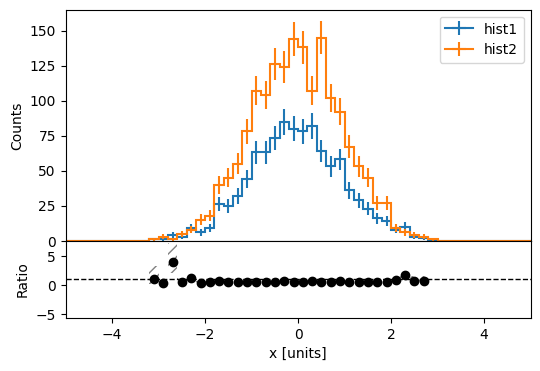

In [10]:
hist_2 = hist.Hist(
    hist.axis.Regular(
        50, -5, 5, name="X", label="x [units]", underflow=False, overflow=False
    )
).fill(np.random.normal(size=1700))

fig = plt.figure(figsize=(6, 4))
main_ax_artists, sublot_ax_arists = hist_1.plot_ratio(
    hist_2,
    rp_ylabel=r"Ratio",
    rp_num_label="hist1",
    rp_denom_label="hist2",
    rp_uncert_draw_type="bar",  # line or bar
)